# DATA IMPORT AND BASIC EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# FEATURE SELECTION

In [5]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app.shape

(307511, 122)

In [8]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [9]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100
msng_info.to_excel(r"missing_info.xlsx",index=False)

In [10]:
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [13]:
msng_col = msng_info[msng_info['msng_pct']>40]['col_name'].to_list()
app_msng_rmvd = app.drop(labels= msng_col,axis=1)
app_msng_rmvd.shape

(307511, 73)

In [14]:
flag_col=[]
for col in app_msng_rmvd.columns:
    if col.startswith("FLAG_"):
        flag_col.append(col)
len(flag_col)

28

In [15]:
flag_tgt_col = app_msng_rmvd[flag_col + ['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


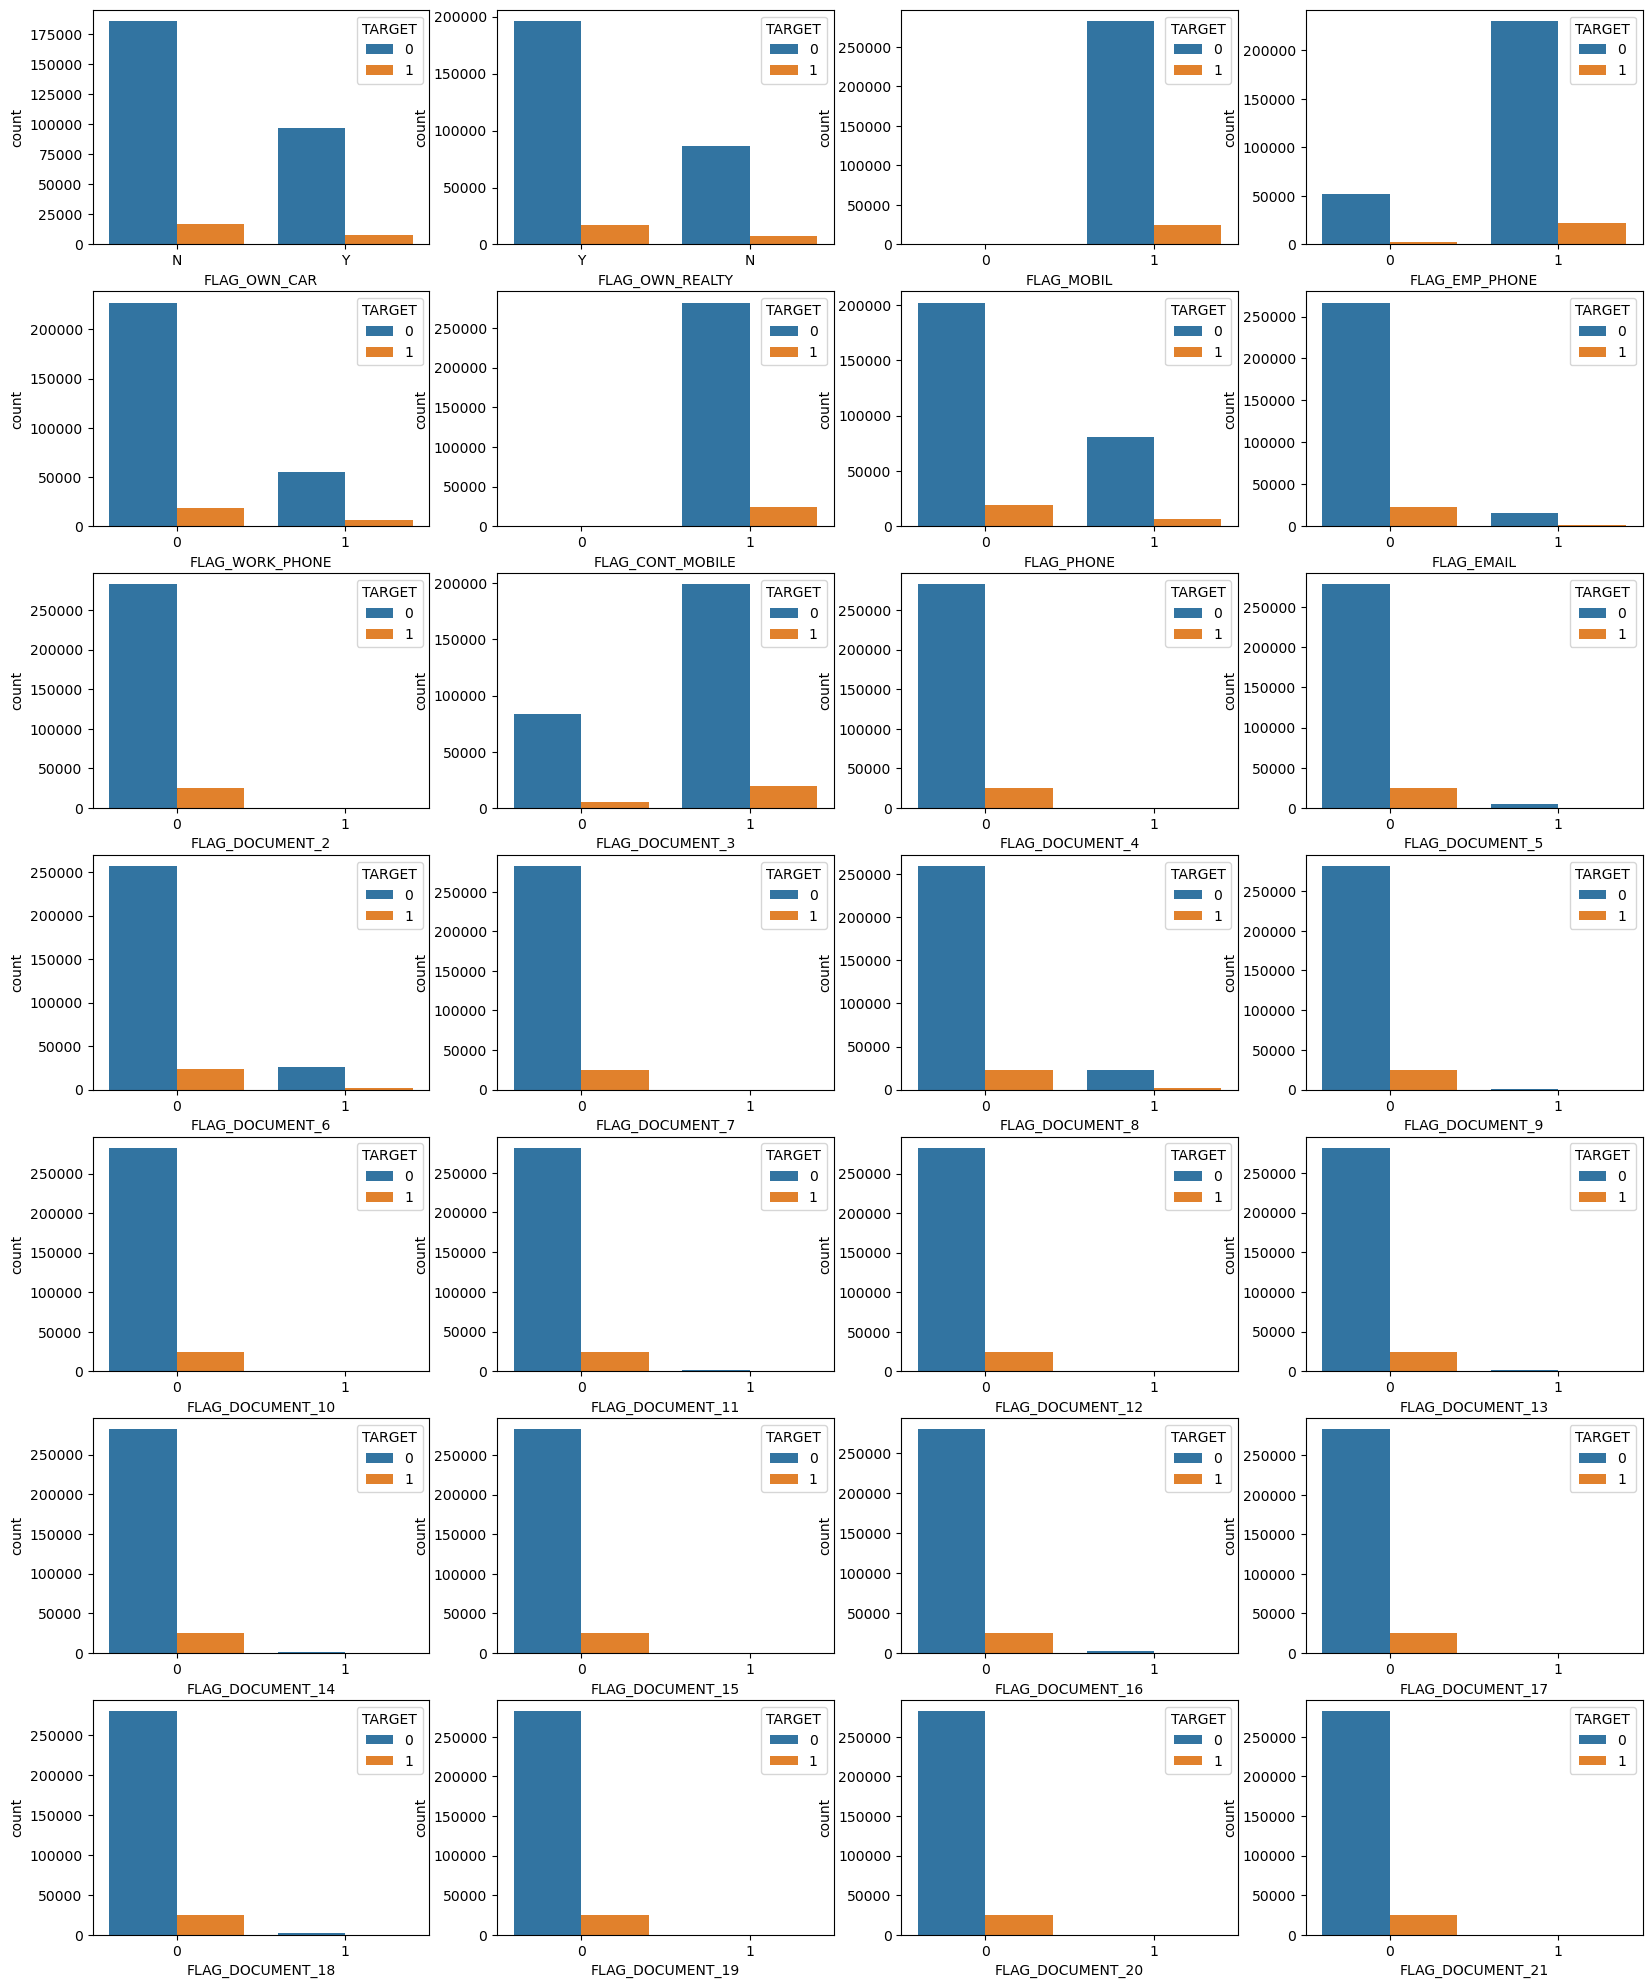

In [18]:
plt.figure(figsize=(20,25))

for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')

In [30]:
flag_corr = ['FLAG_OWN_CAR','FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[flag_corr]
corr_df = round(flag_corr_df.corr(),2)
corr_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4024\1768423109.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = round(flag_corr_df.corr(),2)


,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


In [31]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [32]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4024\3396468737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4024\3396468737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


In [33]:
corr_df = round(flag_corr_df.corr(),2)
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.0,0.15,0.01,-0.01,-0.01,0.03,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.0,-0.07,-0.11,0.01,-0.04,0.03,-0.01
FLAG_MOBIL,-0.00,-0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,-0.01,-0.04,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.03,0.03,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,-0.02,-0.01,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<AxesSubplot: >

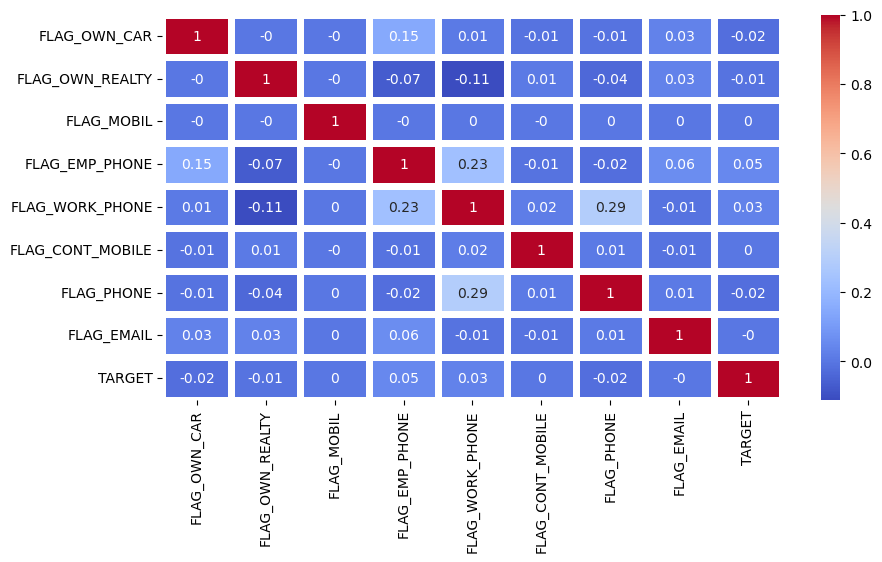

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=5, annot=True)

In [36]:
app_flag_rmvd = app_msng_rmvd.drop(labels=flag_col,axis=1)
app_flag_rmvd.shape


(307511, 45)

<AxesSubplot: >

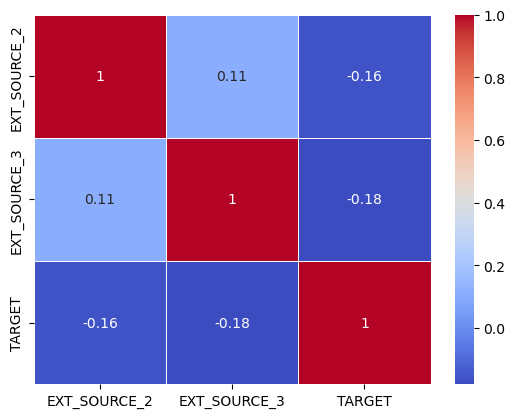

In [38]:
sns.heatmap(data=round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=0.5,annot=True)

In [44]:
app_score_col_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_score_col_rmvd.shape

(307511, 43)

# FEATURE ENGINEERING

In [45]:
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [46]:
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0])

In [47]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [48]:
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna(app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0])
#app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]

In [49]:
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [51]:
app_score_col_rmvd['NAME_TYPE_SUITE'] = app_score_col_rmvd['NAME_TYPE_SUITE'].fillna(app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0])

In [52]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [53]:
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna(app_score_col_rmvd['AMT_ANNUITY'].mean())

In [54]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [55]:
amt_req_col = []
for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [57]:
for col in amt_req_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna(app_score_col_rmvd[col].median())

app_score_col_rmvd[col].isnull().sum()

0

In [58]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [60]:
app_score_col_rmvd['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [61]:
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna(app_score_col_rmvd['AMT_GOODS_PRICE'].median())

In [62]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [63]:
days_col = []
for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [64]:
for col in days_col:
    app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

In [65]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [69]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','ABOVE 900K']
app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [70]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K         8709
100K-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
ABOVE 900K    41880
dtype: int64

In [71]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,472500]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K','ABOVE 400K']
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [74]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
ABOVE 400K     5049
dtype: int64

In [75]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [76]:
bins = [0,200000,400000,600000,800000,1000000,1854000]
ranges = ['0-200k','200-400k','400-600k','600-800k','800-1M','above 1M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels = ranges)

In [77]:
app_score_col_rmvd.groupby('AMT_CREDIT_RANGE').size()

AMT_CREDIT_RANGE
0-200k      36144
200-400k    81151
400-600k    66270
600-800k    43242
800-1M      30719
above 1M    46910
dtype: int64

In [78]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [79]:
app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [80]:
bins = [0,25000,50000,100000,150000,200000,258025]
ranges = ['0-25k','25-50','50-100k','100-150k','150-200k','above 200k']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels = ranges)

In [81]:
app_score_col_rmvd.groupby('AMT_ANNUITY_RANGE').size()

AMT_ANNUITY_RANGE
0-25k         154867
25-50         131347
50-100k        20792
100-150k         437
150-200k          32
above 200k        35
dtype: int64

In [82]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [83]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [84]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [85]:
app_score_col_rmvd['DAYS_EMPLOYED'].max()

365243

In [86]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]
ranges = ['0-5y','5-10y','10-15y','15-20y','20-25y','25-30y','30-35y','35-40y','40-45y','45-50y','above 50y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels = ranges)

In [87]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5y         136309
5-10y         64872
10-15y        27549
15-20y        10849
20-25y         6243
25-30y         3308
30-35y         1939
35-40y          832
40-45y          210
45-50y           24
above 50y     55374
dtype: int64

In [88]:
app_score_col_rmvd['DAYS_EMPLOYED_RANGE'].isnull().sum()

2

In [89]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [90]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7489

In [91]:
bins = [0,7300,10950,14600,18250,21900,25229]
ranges = ['20y','20-30y','30-40y','40-50y','50-60y','above 60y']

app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels = ranges)

In [92]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20y              0
20-30y       45021
30-40y       82308
40-50y       76541
50-60y       68062
above 60y    35579
dtype: int64

In [93]:
app_score_col_rmvd['DAYS_BIRTH'].isnull().sum()

0

# DATA ANALYSIS

In [94]:
obj_var = app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [95]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<AxesSubplot: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

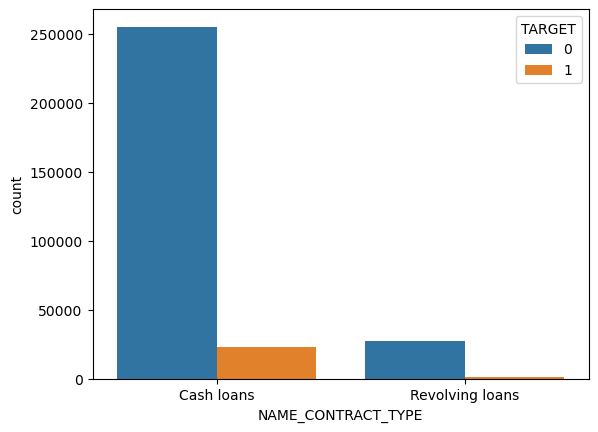

In [96]:
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [101]:
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

In [102]:
data_pct['PCT'] = data_pct['TARGET']*100

In [103]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<AxesSubplot: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

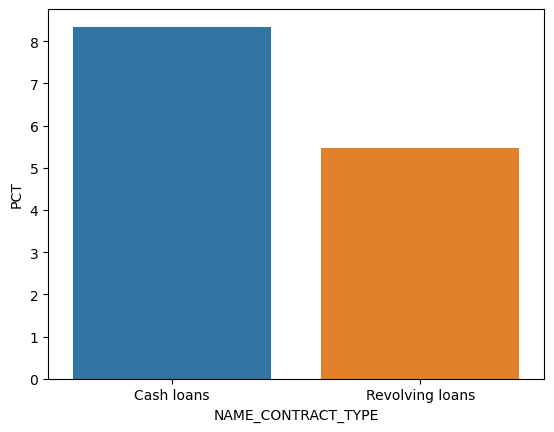

In [105]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<AxesSubplot: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

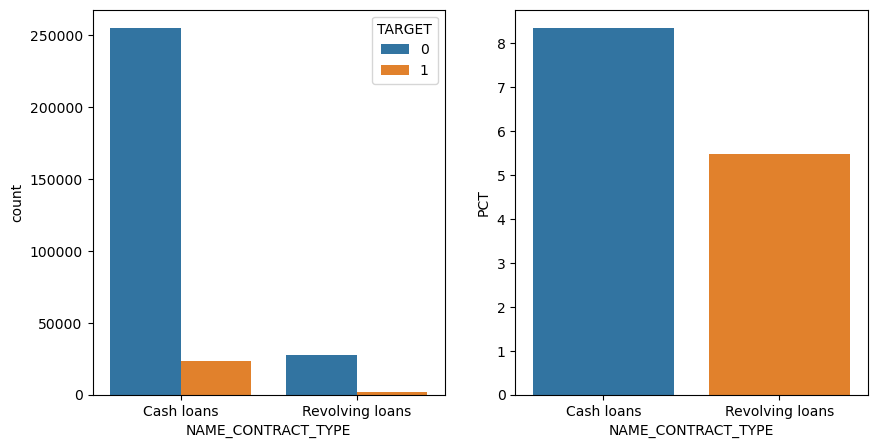

In [106]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')
plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

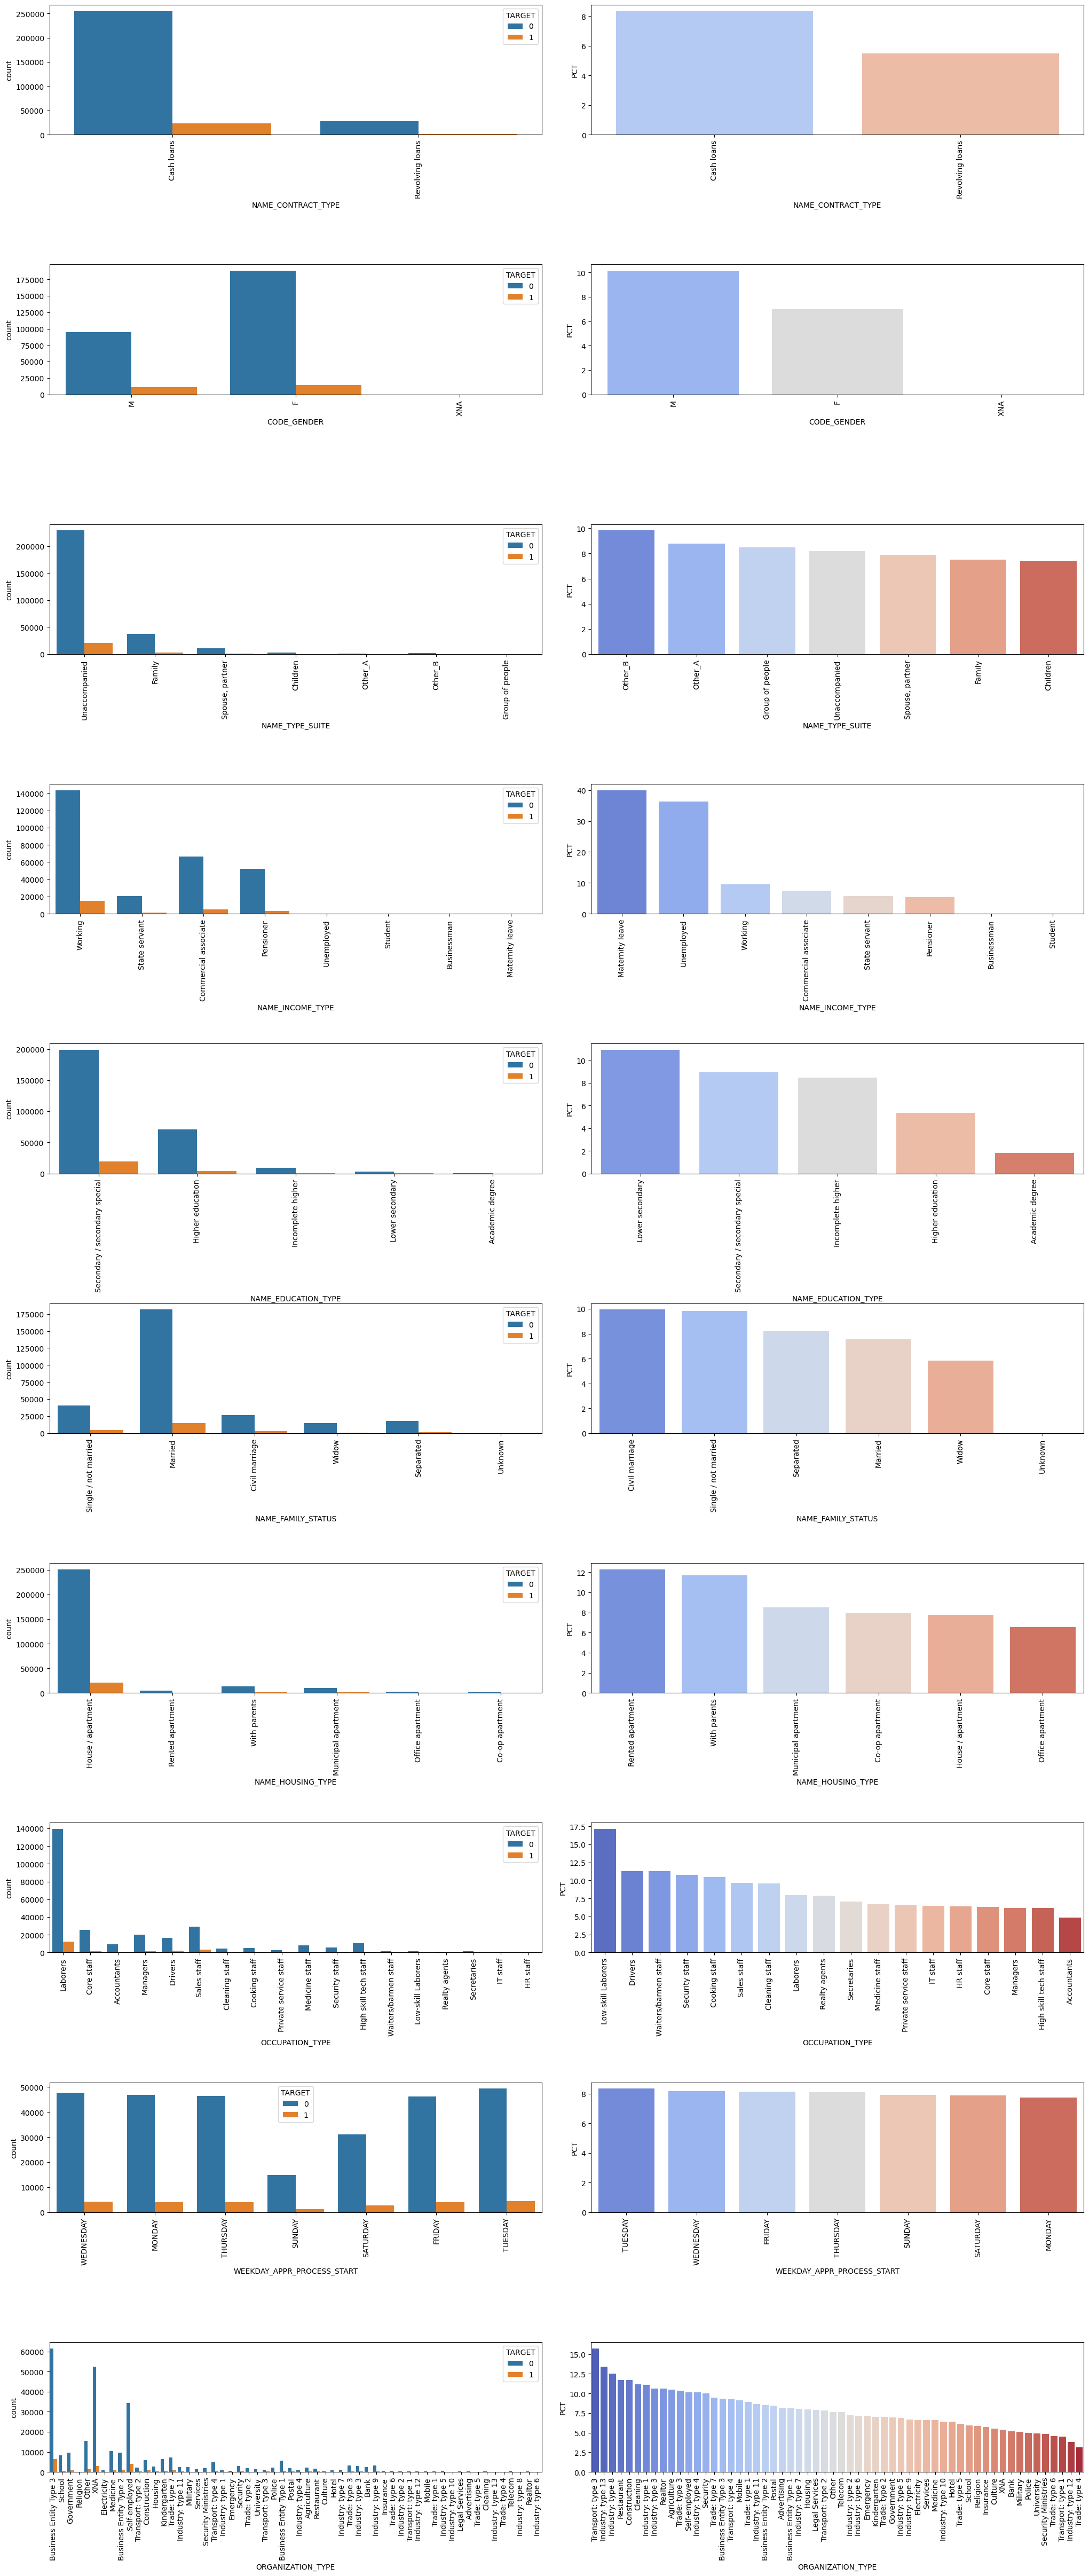

In [107]:
plt.figure(figsize=(25,60))
for i, var in enumerate(obj_var):
  data_pct = app_score_col_rmvd[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending = False)
  data_pct['PCT'] = data_pct['TARGET']*100
  plt.subplot(10,2,i+i+1)
  plt.subplots_adjust(wspace = 0.1,hspace = 1)
  sns.countplot(data=app_score_col_rmvd,x= var,hue='TARGET')
  plt.xticks(rotation = 90)
  plt.subplot(10,2,i+i+2)
  sns.barplot(data= data_pct,x=var,y='PCT', palette= 'coolwarm')
  plt.xticks(rotation = 90)

In [108]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [109]:
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [110]:
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
repayers = num_data[num_data['TARGET']==0]

In [111]:
defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [114]:
defaulters_corr = defaulters.corr()

In [115]:
defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(np.bool_))

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,...,-0.005549,-0.009058,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
CNT_CHILDREN,NaN,NaN,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,...,0.001448,0.025180,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,...,-0.005186,-0.004616,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,NaN,NaN,NaN,NaN,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,...,-0.025979,0.019487,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,0.752295,0.071690,0.014303,-0.081207,-0.034279,...,-0.022394,0.005500,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,0.076053,0.135738,0.006648,0.025661,...,-0.021781,0.020366,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048190,0.015532,0.056222,...,0.025865,0.006793,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582185,0.289114,...,-0.004946,0.005391,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192455,...,0.003191,-0.008305,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.010299,-0.014522,-0.009157,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572


most of the customer have taken cash loan.
customers who have taken cash loans are less likely to default.
CODE_GENDER- most of the loans have been taken by female. default rate for females are just ~7% which is safer and lesser than man.

NAME_TYPE_SUITE - unacompanied people had taken most of the loans and the default rate is ~8.5%, which is safer.

NAME_INCOME_TYPE - Most of the loan is given to the working professionals and their default variable is very low.

NAME_EDUCATION_TYPE - Higher education is the safest segment to give the loan with a default rate of less than 5%.

NAME_FAMILY_STATUS - Married people are safe to target, default rate is 8%

NAME_HOUSING_TYPE - people having house/apartment are safe to give the loan with default rate of ~8%

OCCUPATION_TYPE - low-skill labourers and drivers arre highest defaulters. accountants are less defaulters. core staff, managers and labourers are safer to target with a default rate of <= 7.5 to 10 %.

ORGANISATION_TYPE - transport type 3 has highest defaulter. others, business entity type 3, self employed are good to go with default rate around 10%

In [116]:
defaulters_corr_unstck = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(np.bool_)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var_2',0:'corr'})

defaulters_corr_unstck['corr'] = abs(defaulters_corr_unstck['corr'])
defaulters_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var_2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [117]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='AMT_CREDIT', ylabel='Density'>

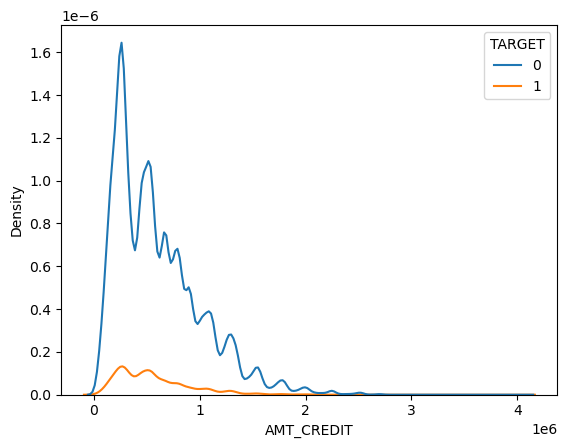

In [118]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

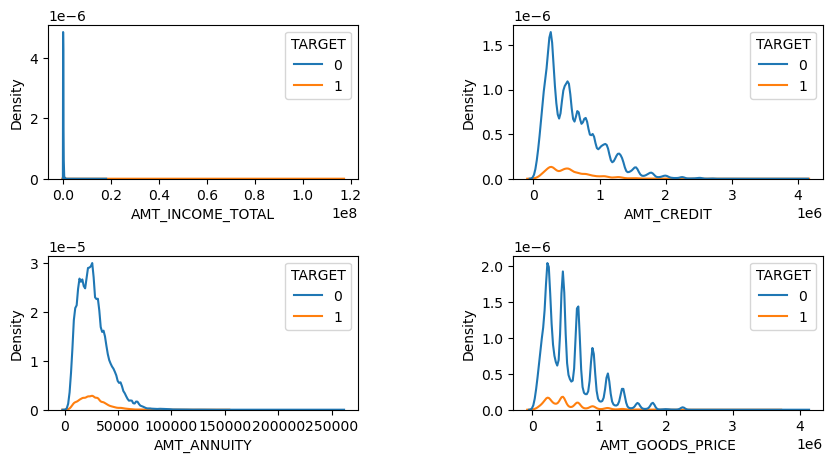

In [120]:
plt.figure(figsize=(10,5))
for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

UNIVARIATE ANALYSIS

1. most of the loans were given for the goods price ranging between 0 to 1 million.
2. most of the loans were given for the credit amount of 0 to 1 million
3. most of the customers are paying annuity of 0 to 50k
4. mostly the customers have income between 0 to 1 million.

In [121]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

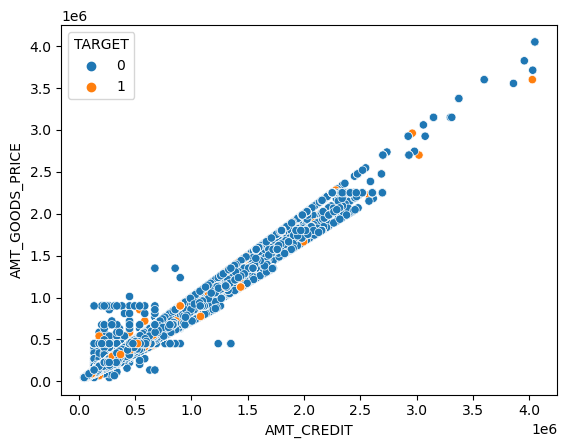

In [122]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<AxesSubplot: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

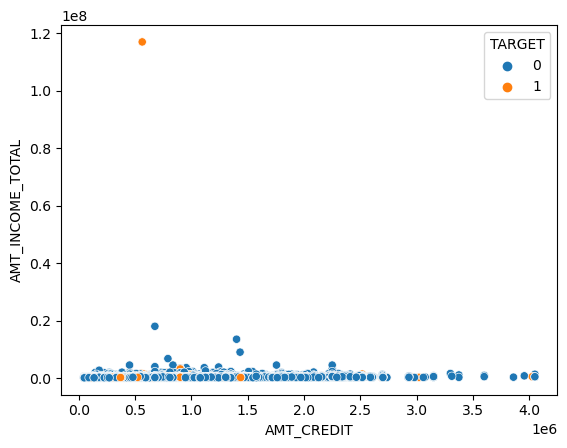

In [123]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

<AxesSubplot: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

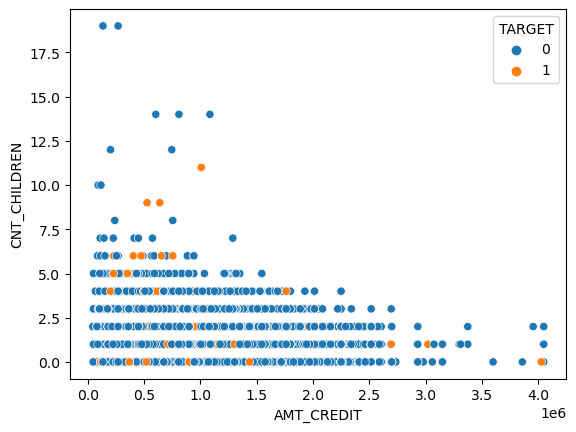

In [124]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

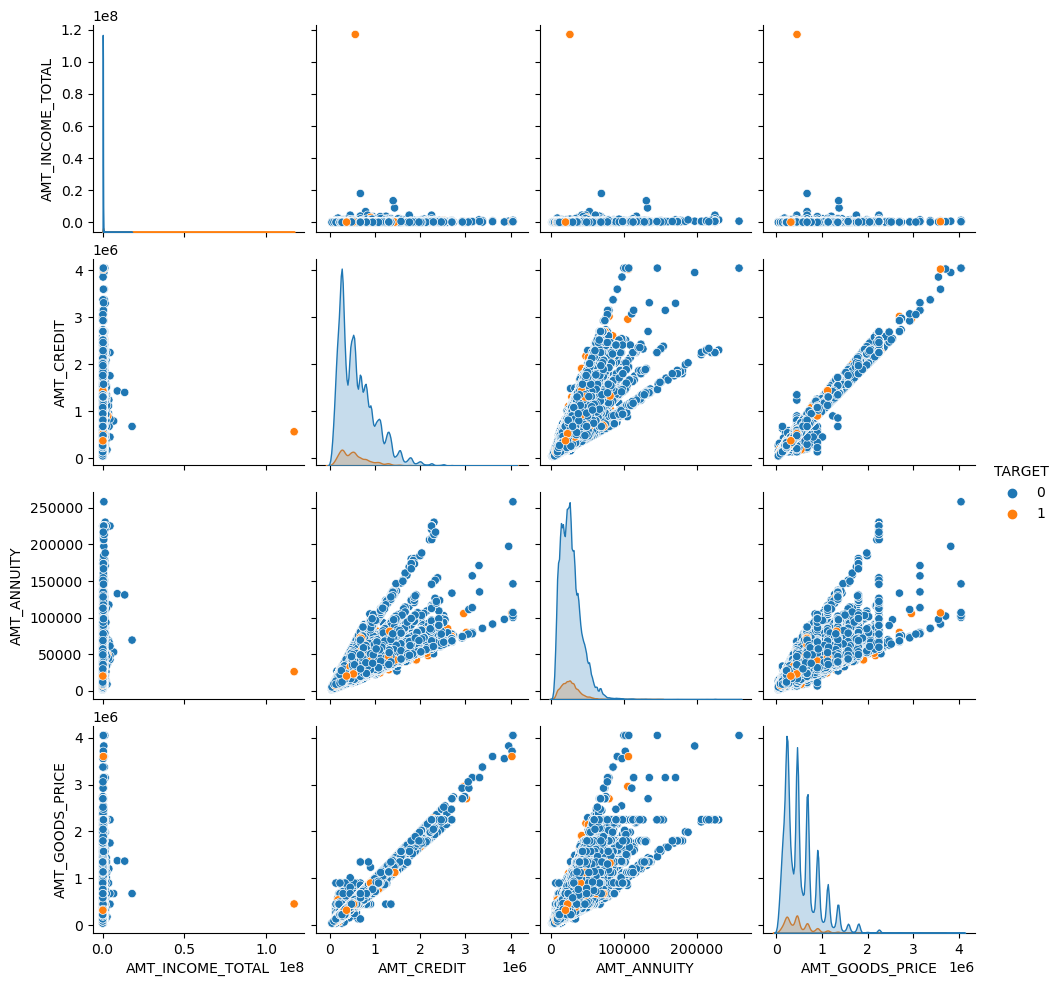

In [125]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
sns.pairplot(data=amt_var,hue='TARGET')

BIVARIATE ANALYSIS

1. AMT_CREDIT and AMT_GOODS_PRICE are linearly correlated, if the AMT_CREDIT increases the defaulters are decreasing.
2. people having income less than or equal to 1 million, are more likely to take loans out of which who are taking loan of less than 1.5 million, could turn out to be defaulters.
3. we can target income below 1 million and loan amount greater than 1.5 million.
4. people having children 1 to less than 5 are safer to give the loans.
5. people who can pay the annuity of  100k are more likely to get the loan and that's upto less than 2 million.

In [126]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [127]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [128]:
len(prev_app.columns)

37

In [129]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)
len(prev_app_nva_col_rmvd.columns)

22

In [130]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [131]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [132]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [133]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

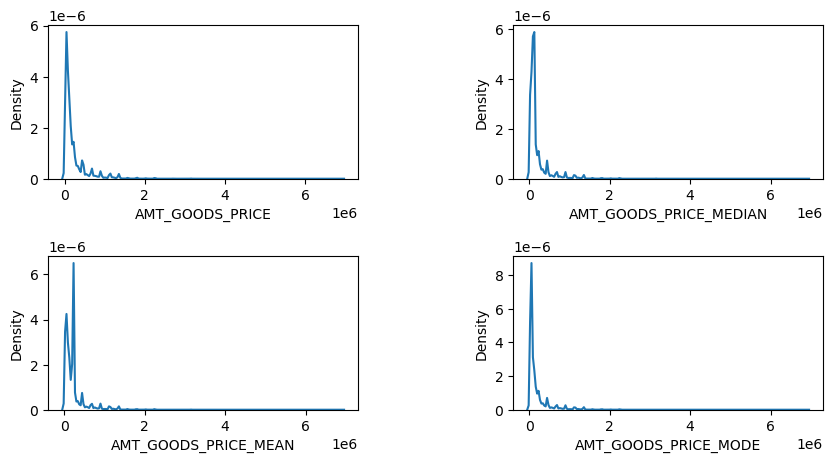

In [134]:
plt.figure(figsize=(10,5))
for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [135]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [136]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [137]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [138]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION']=prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [139]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [140]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [141]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [142]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [143]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [144]:
len(prev_app_nva_col_rmvd.columns)

22

In [145]:
merge_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


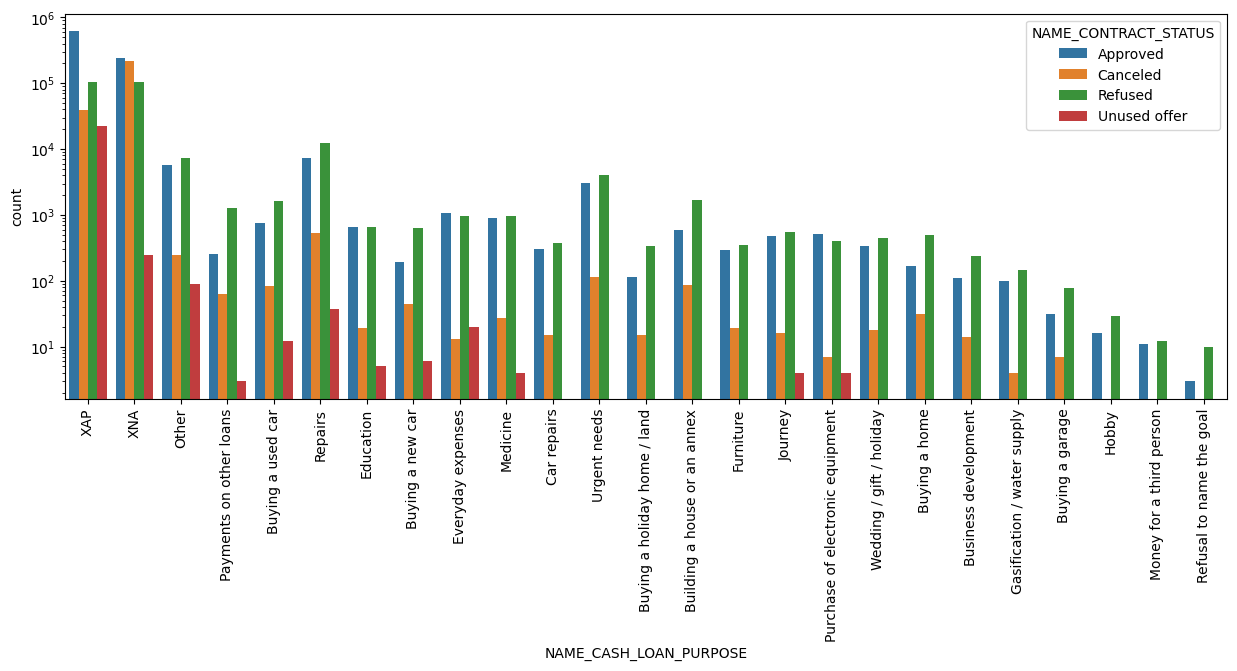

In [146]:
plt.figure(figsize=(15,5))

sns.countplot(data=merge_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<AxesSubplot: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

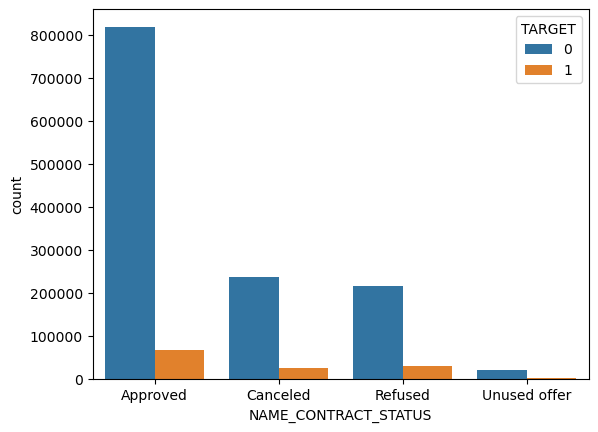

In [147]:
sns.countplot(data=merge_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

ANALYSIS ON MERGED DATA

1. for the repairing purpose customers had applied mostly prev. and the same purpose has most number of cancelations.
2. most of the app. which were prev. either canceled or refused 80-90% of them are repair in the current data.
3. offers which were unused prev. now have maximum number of defaulters despite of having high income band customers.

In [148]:
merged_agg = merge_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()
merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4024\1112762309.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merge_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<AxesSubplot: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

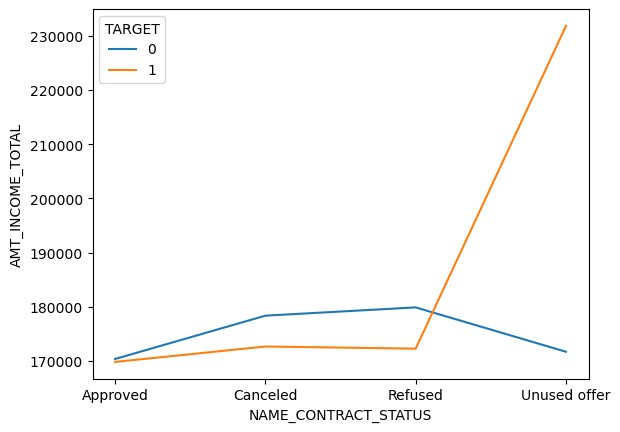

In [149]:
sns.lineplot(data=merge_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

# CONCLUSION

bank should target the customers - 

1. the credit amount should not be more than 1 million
2. annuity can be made of 50k (depending on the eligibility)
3. customers having low income-
    1. working in others, business entity type 3,self employed org. type
    2. working as accountants, core staff, managers, and laborers
    3. having house/appartment and are married and having children not more than 5
    4. highly educated
    5. preferably female

4. unaccompanied people can be safer - default rate is ~8.5%
5. income bracket could be below 1 million.

6. 80-90% of customer who were previously canceled/refused, are repayers. bank can do the analysis and can consider to give loan to these segments
7. 

precautions - 

1. organistion transport type 3 should be avoided.
2. low-skill laborers and drivers should be avoided.
3. offers previously unused and high income customer should be avoided.